## Import necessary libraries
The first step is to import the necessary libraries that will be used in this lab. We will be using numpy, matplotlib, scipy, and sklearn.
<br>
- `matplotlib.pyplot`：用來畫圖。
- `numpy`：處理數值與資料。
- `expit`：Sigmoid 函數，用來畫 logistic regression 的 S 型曲線。
- `LogisticRegression`：邏輯迴歸模型（分類用）。
- `LinearRegression`：線性迴歸模型（回歸用）。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

## Generate a toy dataset
The next step is to generate a toy dataset, which is a straight line with some Gaussian noise. We will be using numpy to generate this dataset.
<br>
- 利用高斯分布隨機產生資料點 `X`。
- `y` 是依據 `X` 是否大於 0 來給定標籤（0 或 1）。
- 右側資料加倍，製造資料不對稱。
- 加入雜訊模擬真實情況。

用途：模擬像「是否購買產品」、「是否患病」這類二分類資料。

In [2]:
# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

## Fit the classifier
After generating the dataset, we will fit the classifier using LogisticRegression from scikit-learn.
<br>
- 使用 `clf = LogisticRegression(C=1e5)` 建立模型。
- `C` 值越大，表示正則化效果越小，模型更自由地擬合資料。
- 使用 `.fit(X, y)` 訓練模型。

In [3]:
# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0)

## Plot the result
The final step is to plot the result. We will use matplotlib to create a scatter plot of the example data, and plot the logistic regression model and linear regression model.
<br>
- 使用 `ols = LinearRegression()`。
- 線性迴歸會產生非 0-1 區間的預測值，這在分類問題中不合適，但有比較意義。
<br>
- 散點圖：顯示原始資料分佈。
- 紅線：Logistic Regression 的 Sigmoid 預測機率。
- 灰線：Linear Regression 的預測直線。
- 水平線 `y=0.5` 表示 Logistic 模型的分類門檻。
- 使用 `plt` 完成整體視覺化。

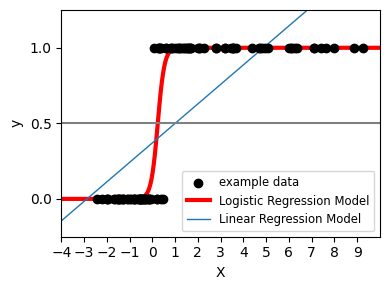

In [9]:
# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")
plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

## Summary
This lab provided a step-by-step guide on how to create a Logistic Regression Model using Python's scikit-learn library. We began by importing necessary libraries, generating a toy dataset, fitting the classifier, and finally plotting the result.

## Logistic Regression
- 輸出為機率值 (0~1)，適合分類
- 是否患病、是否買單等二分類問題
<br>
## Linear Regression
- 輸出為連續值，不適合分類
- 預測價格、溫度等連續變數

---

## Logistic Regression 常見應用：

- 預測是否信用卡違約
- 預測是否點擊廣告
- 判斷電子郵件是否為垃圾信
